In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import metrics

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df = pd.read_csv('Summer-Olympic-medals-1976-to-2008.csv', encoding= 'unicode_escape')

In [ ]:
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [ ]:
pd.isnull(df).sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df['Year'] = df['Year'].astype(int)

In [ ]:
df.describe()

,Year
count,15316.000000
mean,1993.620789
std,10.159851
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


# EXPLOTARY DATA ANALYSYS

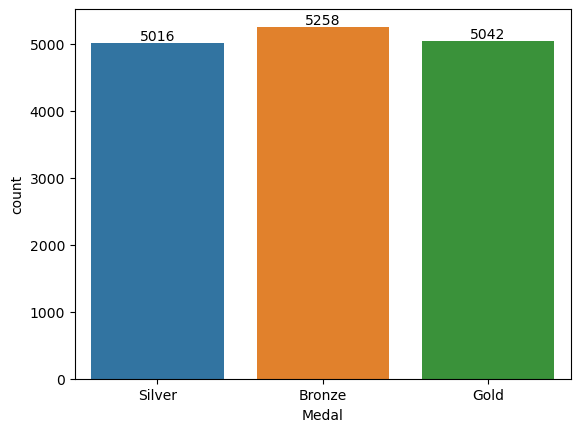

In [ ]:
ax = sns.countplot(x='Medal' , data = df)
for i in ax.containers:
    ax.bar_label(i)

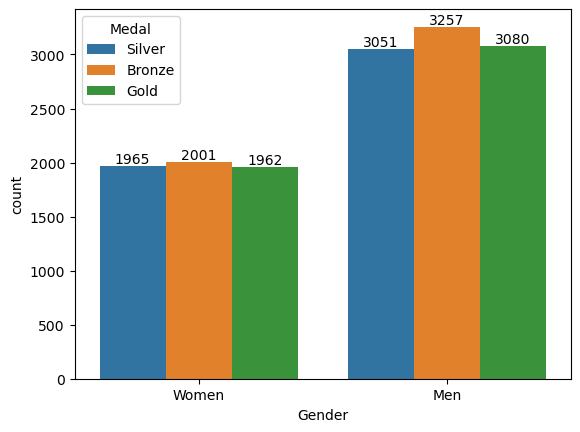

In [ ]:
ax=sns.countplot(data=df,x='Gender',hue = 'Medal')
for i in ax.containers:
    ax.bar_label(i)

# Medals across years:

In [ ]:
ax = sns.countplot(data =df , x= 'Year' , hue = 'Medal')
for i in ax.containers:
    ax.bar_label(i)

sns.set(rc = {'figure.figsize':(24,12)})

NameError: name 'sns' is not defined

# Top  Countries &atheltes  :

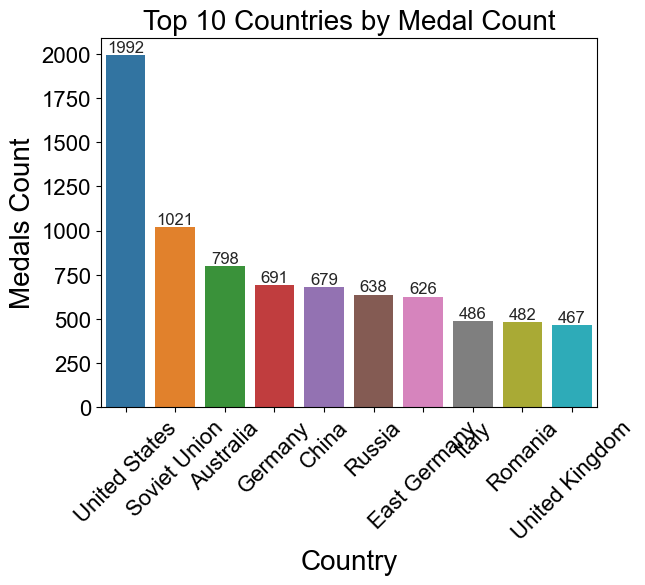

In [ ]:
med_count = df.groupby(['Country'],as_index = False)['Medal'].count().sort_values(by = 'Medal',ascending = False).head(10)
ax = sns.barplot(data = med_count,x='Country', y = 'Medal')
sns.set(rc={'figure.figsize':(20,10)})
for i in ax.containers:
    ax.bar_label(i)


plt.xlabel("Country", fontsize=20)
plt.ylabel("Medals Count", fontsize=20)
plt.title("Top 10 Countries by Medal Count", fontsize=20)

plt.xticks(fontsize=16, rotation=45)  # Rotate if names are long
plt.yticks(fontsize=16)

plt.show()

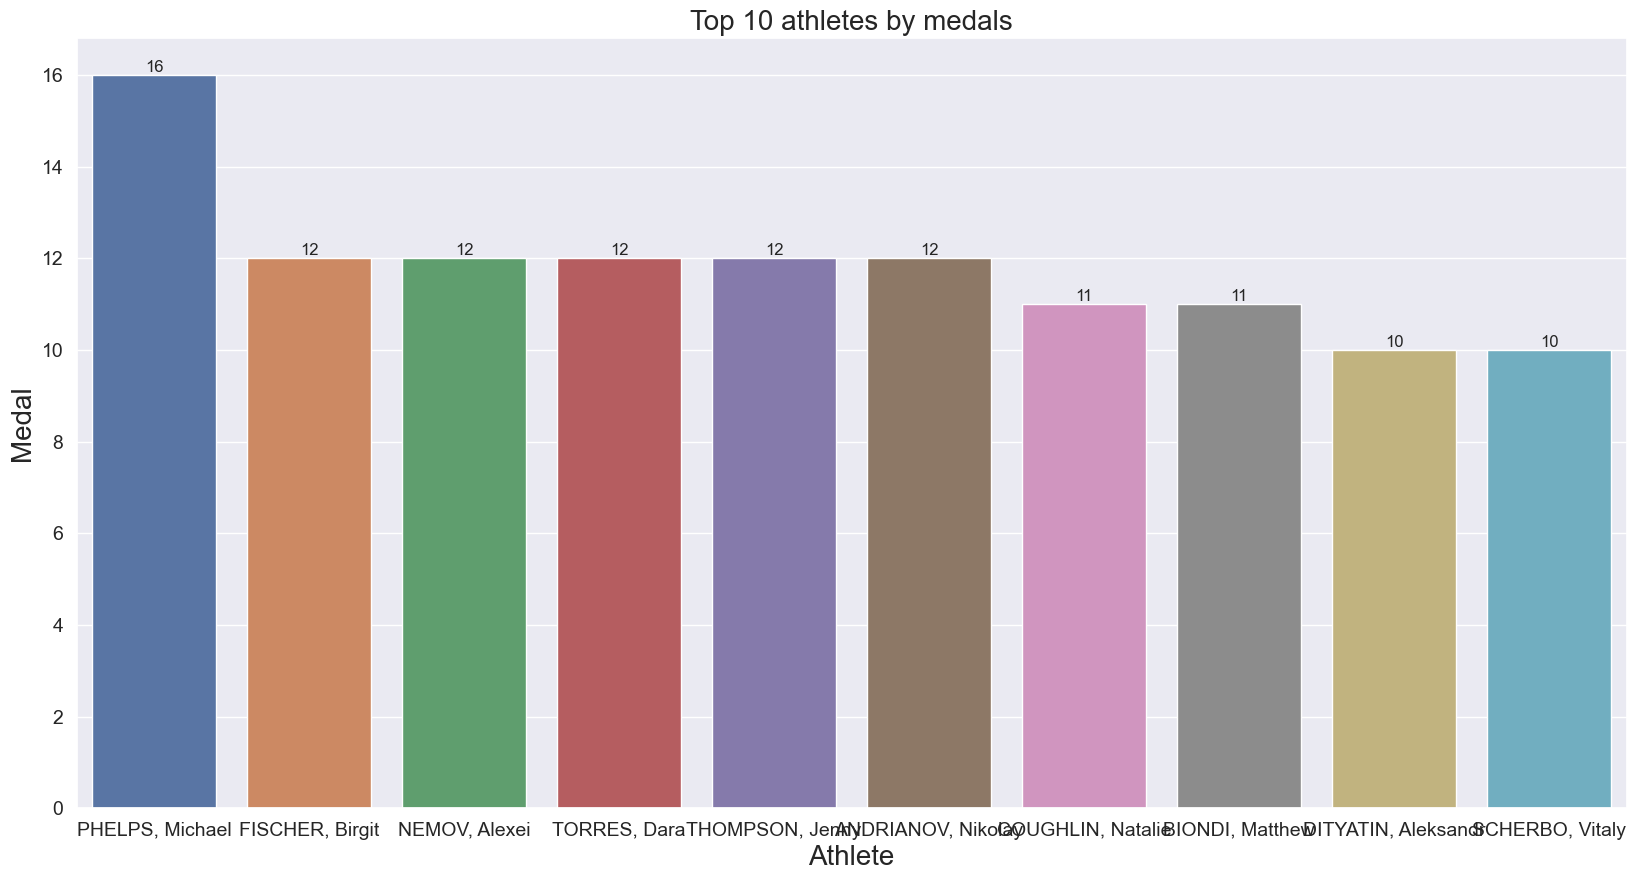

In [ ]:
ax = df.groupby(['Athlete'],as_index = False)['Medal'].count().sort_values(by = 'Medal',ascending = False).head(10)
bx = sns.barplot(data = ax, x = 'Athlete' , y = 'Medal')
for i in bx.containers:
    bx.bar_label(i)

sns.set(rc = {'figure.figsize':(24,12)})

plt.xlabel('Athlete',fontsize =20)
plt.ylabel('Medal',fontsize = 20)
plt.title("Top 10 athletes by medals",fontsize = 20)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# most medals by sports

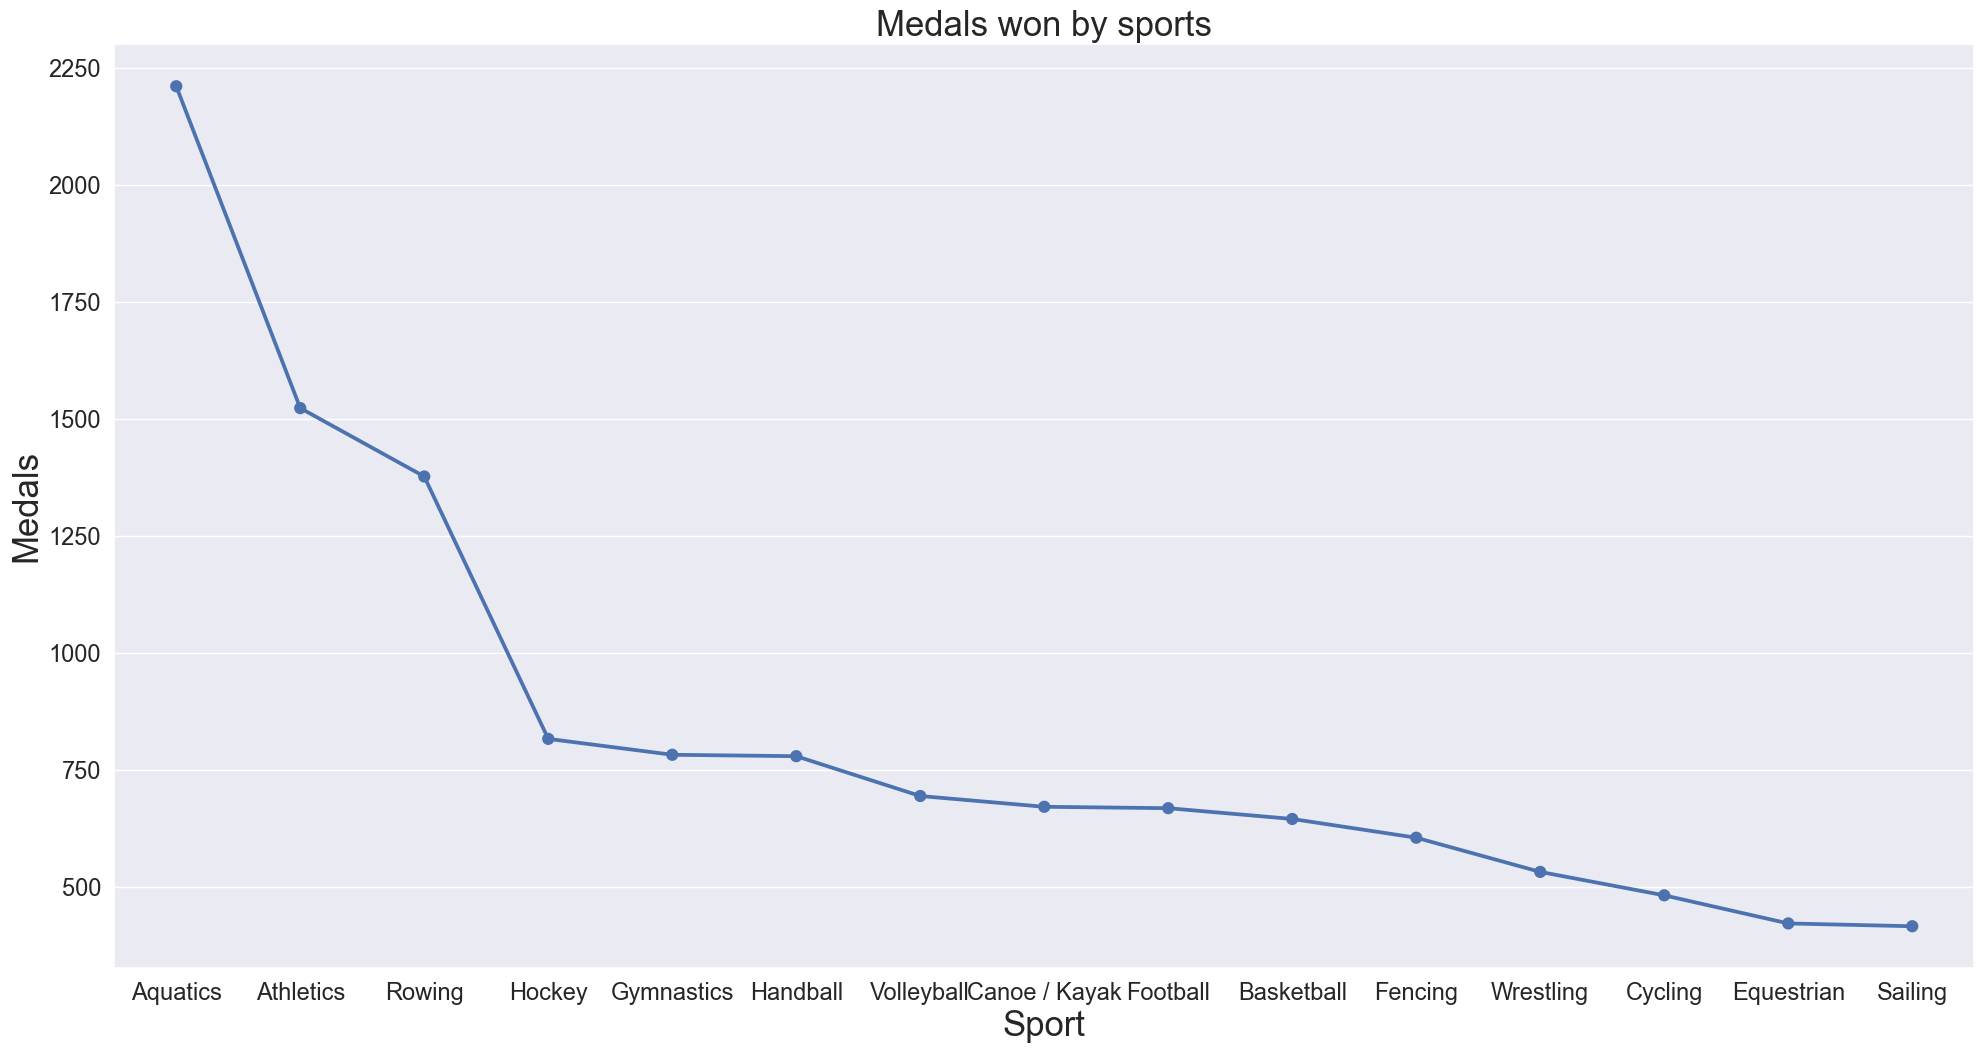

In [ ]:
med_spo = df.groupby(['Sport'],as_index = False)['Medal'].count().sort_values(by = 'Medal',ascending = False).head(15)
ax = sns.pointplot(data = med_spo,x='Sport',y = 'Medal')

plt.xlabel("Sport",fontsize=25)
plt.ylabel("Medals",fontsize = 25)
plt.title("Medals won by sports",fontsize = 25)

plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.show()

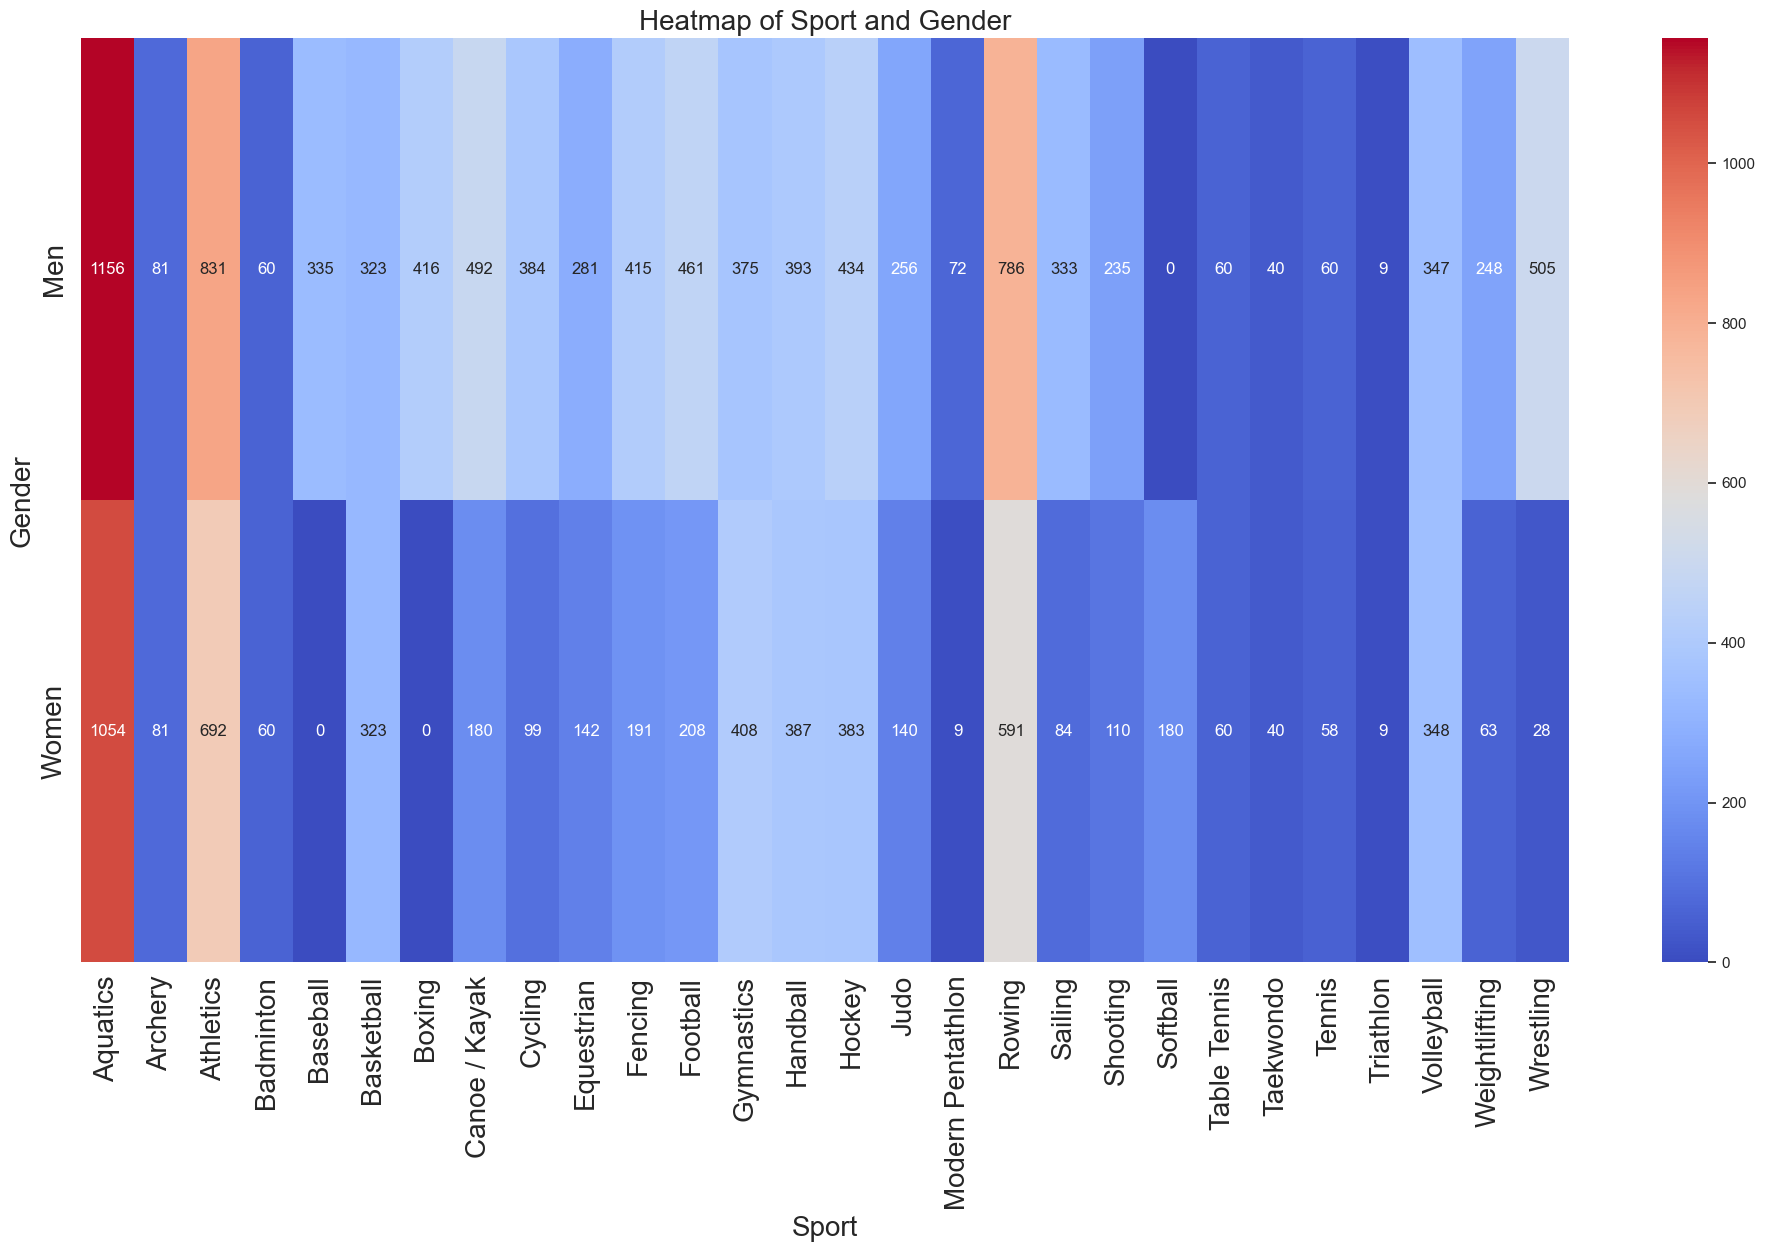

In [ ]:
gen_s = df.pivot_table(index='Gender', columns='Sport', aggfunc='size', fill_value=0)
sns.heatmap(gen_s, annot=True, cmap='coolwarm', fmt='d')

plt.title("Heatmap of Sport and Gender", fontsize=20)
plt.xlabel("Sport", fontsize=20)
plt.ylabel("Gender", fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
df.columns

Index(['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender',
       'Country_Code', 'Country', 'Event_gender', 'Medal'],
      dtype='object')

In [ ]:
X = df.drop(['Medal'], axis = 1)
X.shape

(15316, 10)

In [ ]:
Y =df['Medal']
Y.shape

(15316,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(15316, 10) (12252, 10) (3064, 10)


In [ ]:
print(Y.shape,Y_train.shape,Y_test.shape)

(15316,) (12252,) (3064,)


In [ ]:
model = LinearRegression()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode all object-type columns
le = LabelEncoder()
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = le.fit_transform(X_train[col])

# Check transformed data
print(X_train.head())

       City  Year  Sport  Discipline  Event  Athlete  Gender  Country_Code  \
7607      1  1996      0          29     75     2920       0           114   
10978     8  2000     17          25    222     7737       0            20   
1260      5  1976     19          27     86     5035       0           112   
2006      6  1980      9          21    277     6563       0           112   
1455      6  1980      0          29     74     4380       1            37   

       Country  Event_gender  
7607       110             0  
10978       20             0  
1260        89             2  
2006        89             2  
1455        27             1  


In [ ]:
print(Y_train.unique())
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

print(le.classes_)  # Check the mapping of categories to numbers


['Gold' 'Bronze' 'Silver']
['Bronze' 'Gold' 'Silver']


In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
training_data_prediction = model.predict(X_train)

In [ ]:
print(training_data_prediction)

[1.0081595  0.93941287 0.952246   ... 0.96651054 0.95673459 1.04651608]


In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.0022368704736047684
Mean Absolute Error :  0.6821431876339815


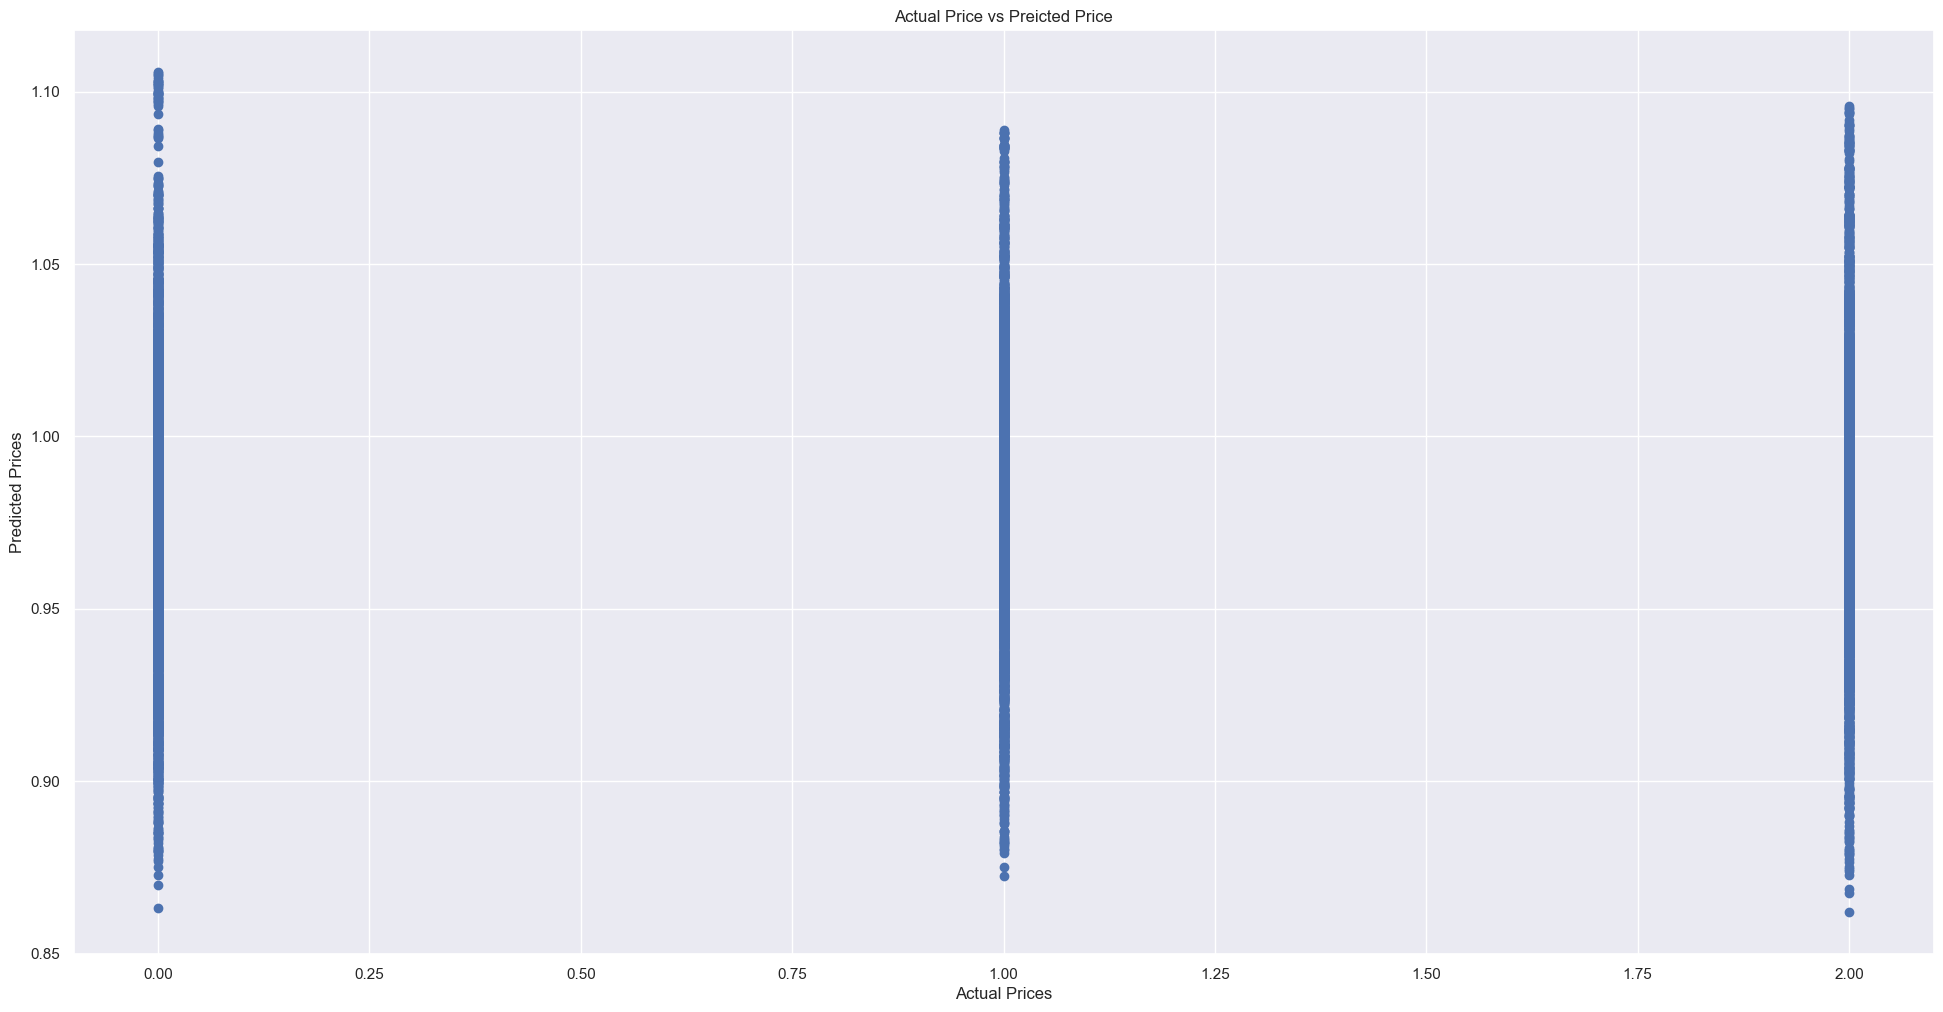

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [ ]:
test_data_prediction = model.predict(X_test)

ValueError: could not convert string to float: 'Montreal'

In [ ]:
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
